In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import re
from glob import glob
from tqdm.auto import tqdm

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# define the year range 
year_range = [f'{i}_{i+2}' for i in range(1990,2023,3)]

# create the region_dict
region_dict = dict(zip(['华东','东北','中南','华北','西北','西南'],
                       ['huadong','dongbei','zhongnan','huabei','xibei','xinan']))

##### train_test_split and apply randomforest_classifier

In [4]:
# function to identify band names given the different L5/7/8 images
def get_band_names(df):
     # _______________________________Different band combination_______________________________
    
    col_name = ''.join(df.columns)

    
    # find the spectrum band names
    Spectrum_reg = re.compile(r'(B6_VCID_\d|B\d{1,2}|Landsat_B\d{1,2}|Sentinel_B\d{1,2}A?)')
    Spectrum_reg_bands = Spectrum_reg.findall(col_name)
    
    # find the Mean-nomalized names
    Mean_nomalize_bands = ['NDVI','NDBI','EVI']
    
    # find the Fourire names
    Fourier_reg   = re.compile(r'((EVI|NDBI|NDVI)_(constant|\w{3}_\d))')
    Fourier_bands = [i[0] for i in Fourier_reg.findall(col_name)]
    
    # get the terrain bands
    Terrain_bands = ['DEM','SLOPE']
    
    # get the meterology bands
    Meterology_bands = ['lrad', 'prec', 'pres', 'shum', 'srad', 'temp', 'wind']

    
    # get band names
    bands_in = zip(['Spectrum',
                    'Spectrum_Normalize',
                    'Spectrum_Normalize_Fourier',
                    'Spectrum_Normalize_Fourier_Terrain',
                    'Spectrum_Normalize_Fourier_Terrain_Meterology'],
                   
                   [Spectrum_reg_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands + Terrain_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands + Terrain_bands + Meterology_bands])
    
    return bands_in

In [5]:
# function to grid seach each tree number
def grid_search_tree(year, region_en, bands_in):
    acc_stats = {}
    bands_in = list(bands_in)
    print(f'Grid search for {year}_{region_en} ...')
    
    for band_name, bands_select in tqdm(bands_in,total=len(bands_in)):
    
        # get the X and y
        X_train = fe[bands_select]
        y_train = fe['Built']

        # import testing sample
        test_sample = pd.read_csv(f'./Data/Grid_select_{region_en}_{year}.csv')
        test_sample = test_sample.drop(['system:index','.geo'],axis=1)
        # get the X,y value
        X_test = test_sample.drop('Built',1)[bands_select]
        y_test = test_sample['Built']     


        # _______________________Grid search to compare the accuracy under different trees__________

        for tree in range(1,121):

            # perform the RF classification
            RF = RandomForestClassifier(n_estimators=tree,n_jobs=-1)
            RF.fit(X_train,y_train)

            # get the accuracy, here get two kinds of accuracy
            y_pred = RF.predict(X_test)
            acc_test = accuracy_score(y_test,y_pred)

            # add results to the acc_dict
            acc_stats[(year,region_en,band_name,tree)]=[acc_test]
             
    return acc_stats

In [6]:
all_acc_stats = {}

# loop through each region
for region_en in region_dict.values():

    # import the points with image values 
    feature_df = [pd.read_csv(f'./Data/Training_sample_{region_en}_{year}.csv') for year in year_range]
    # merge all pt_with_img and remove unnecessary columns
    feature_df = [fe.drop(['system:index','.geo'],axis=1) for fe in feature_df]

    for year,fe in zip(year_range,feature_df):

        # get the band names combination
        bands_in = get_band_names(fe)

        # get the accuracy stats
        acc_stats = grid_search_tree(year,region_en, bands_in)   
        
        # store stats
        all_acc_stats.update(acc_stats)

Grid search for 1990_1992_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1993_1995_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1996_1998_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1999_2001_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2002_2004_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2005_2007_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2008_2010_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2011_2013_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2014_2016_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2017_2019_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2020_2022_huadong ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1990_1992_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1993_1995_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1996_1998_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1999_2001_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2002_2004_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2005_2007_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2008_2010_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2011_2013_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2014_2016_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2017_2019_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2020_2022_dongbei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1990_1992_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1993_1995_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1996_1998_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1999_2001_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2002_2004_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2005_2007_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2008_2010_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2011_2013_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2014_2016_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2017_2019_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2020_2022_zhongnan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1990_1992_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1993_1995_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1996_1998_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1999_2001_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2002_2004_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2005_2007_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2008_2010_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2011_2013_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2014_2016_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2017_2019_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2020_2022_huabei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1990_1992_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1993_1995_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1996_1998_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1999_2001_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2002_2004_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2005_2007_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2008_2010_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2011_2013_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2014_2016_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2017_2019_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2020_2022_xibei ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1990_1992_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1993_1995_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1996_1998_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 1999_2001_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2002_2004_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2005_2007_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2008_2010_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2011_2013_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2014_2016_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2017_2019_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

Grid search for 2020_2022_xinan ...


  0%|          | 0/5 [00:00<?, ?it/s]

##### Save the grid_acc  to disk

In [9]:
# grid_acc = pd.DataFrame(all_acc_stats).T.reset_index()
# grid_acc.columns = ['Year','region','In_Bands','Tree','Accuracy']
# grid_acc.to_csv(f'./Result/Grid_acc_tree.csv',index = False)

# load the grid_acc
grid_acc = pd.read_csv(f'./Result/Grid_acc_tree.csv')
grid_acc['Year'] = grid_acc['Year'].astype('category')

##### Observe that the tree number of 100 is enough for classification

<Axes: xlabel='Tree', ylabel='Accuracy'>

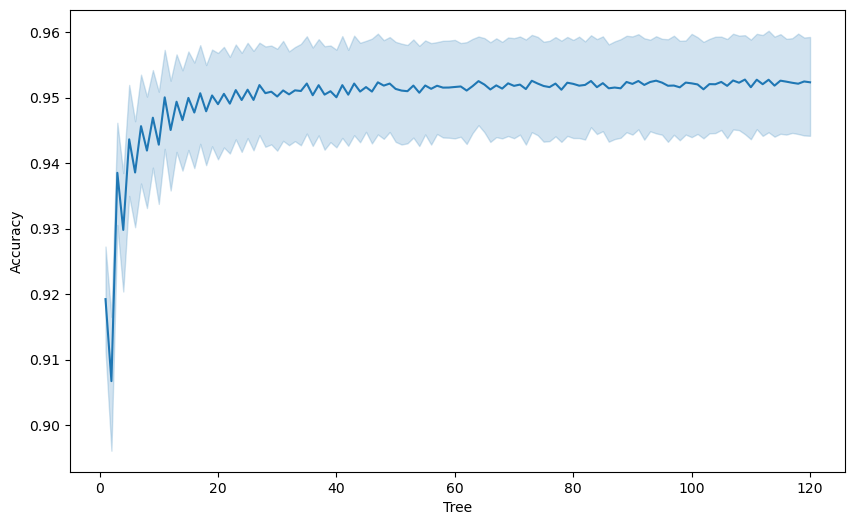

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data = grid_acc[grid_acc['In_Bands']=='Spectrum_Normalize_Fourier_Terrain_Meterology'],
             x='Tree',
             y='Accuracy')

##### Observe that the Fourier bands significant increases the accuracy

<Axes: xlabel='Year', ylabel='Accuracy'>

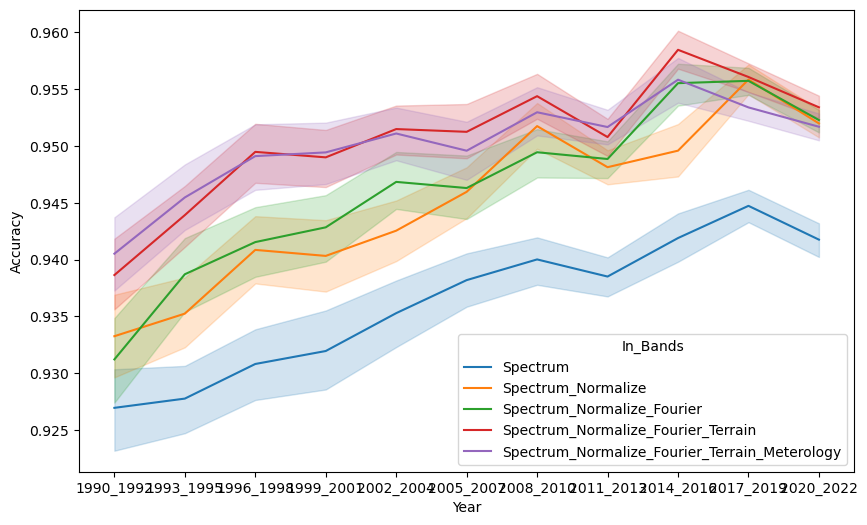

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data = grid_acc,
             x='Year',
             y='Accuracy',
             hue = 'In_Bands')

##### Compare all region's accuracy

In [19]:
All_accurac_df_tree_100 = grid_acc[grid_acc['Tree'] == 100]
All_accurac_df_tree_100.head(2)

,Year,region,In_Bands,Tree,Accuracy
99,1990_1992,huadong,Spectrum,100,0.979218
219,1990_1992,huadong,Spectrum_Normalize,100,0.984108


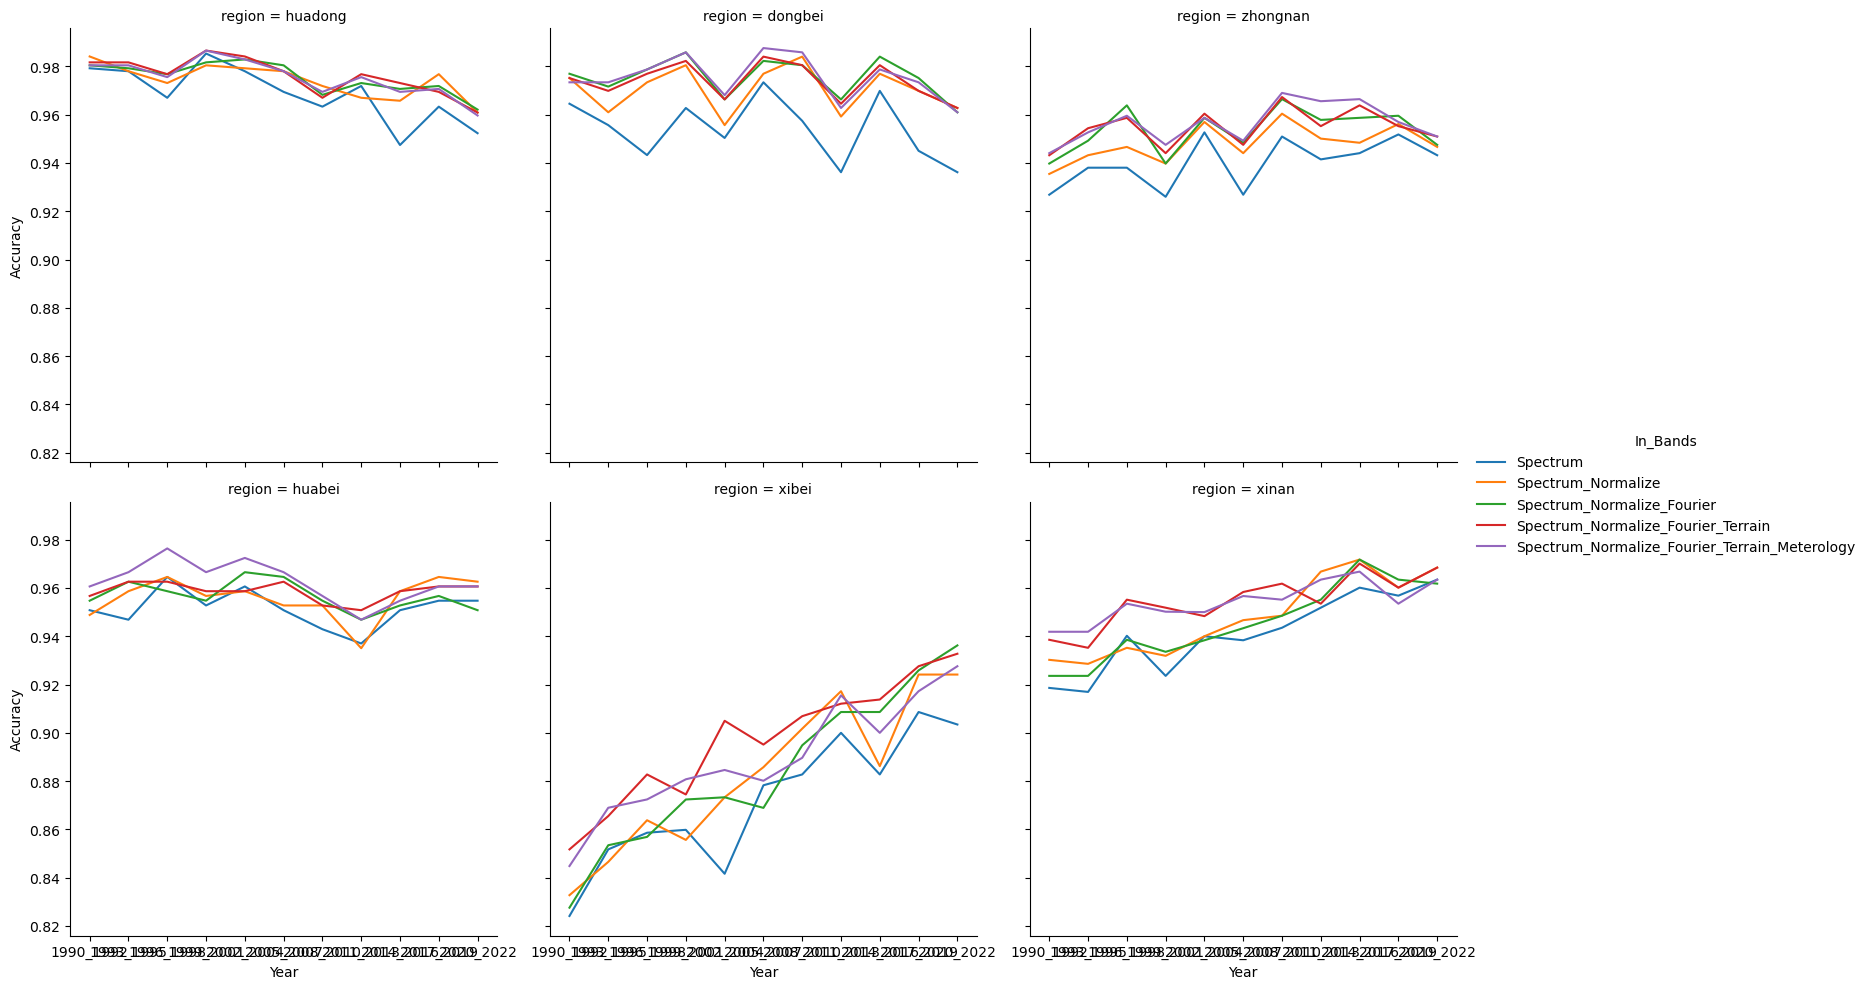

In [20]:
sns.relplot(data=All_accurac_df_tree_100,x='Year',y='Accuracy',hue='In_Bands',col='region',kind="line",col_wrap=3)